In [4]:
a# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test (1).zip
Archive:  colab_train_test.zip
replace test/ad/ad_test_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  infl

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/50
30/30 [==============================] - 5s 175ms/step - loss: 0.7057 - accuracy: 0.4667 - val_loss: 0.6896 - val_accuracy: 0.5200
Epoch 2/50
30/30 [==============================] - 5s 168ms/step - loss: 0.6913 - accuracy: 0.4867 - val_loss: 0.6806 - val_accuracy: 0.6200
Epoch 3/50
30/30 [==============================] - 5s 170ms/step - loss: 0.6888 - accuracy: 0.5400 - val_loss: 0.6842 - val_accuracy: 0.7000
Epoch 4/50
30/30 [==============================] - 5s 169ms/step - loss: 0.6941 - accuracy: 0.5133 - val_loss: 0.6780 - val_accuracy: 0.6000
Epoch 5/50
30/30 [==============================] - 5s 170ms/step - loss: 0.6846 - accuracy: 0.5933 - val_loss: 0.6665 - val_accuracy: 0.6000
Epoch 6/50
30/30 [==============================] - 5s 170ms/step - loss: 0.6697 - accuracy: 0.6133 - val_loss: 0.6421 - val_accuracy: 0.8400
Epoch 7/50
30/30 [==============================] - 5s 171ms/step 

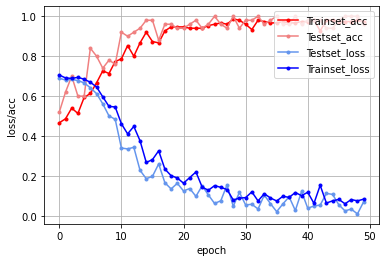

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=30,  #적절한 값으로 조절합니다.
       epochs=50,   #적절한 값으로 조절합니다.
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
